In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

### KNN Model

In [2]:
#Euclidean Distance
def euclidean_distance(p,q): 
    return np.sqrt(np.sum((p-q)**2))

In [3]:
#Importing the required modules
from scipy import stats

#Function to calculate KNN
def knn(X_train, Y_train , X_test, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in X_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(X_train)): 
            distances = euclidean_distance(np.array(X_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = Y_train[dist]
         
        #Majority voting
        lab = stats.mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

### Data manipulation

In [4]:
dataFrame = pd.read_csv("heart.csv")
dataFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
dummie_sex = pd.get_dummies(dataFrame.Sex)
dummie_EA = pd.get_dummies(dataFrame.ExerciseAngina)
dummie_CP = pd.get_dummies(dataFrame.ChestPainType)
dummie_RECG = pd.get_dummies(dataFrame.RestingECG)
dummie_STS = pd.get_dummies(dataFrame.ST_Slope)


#Merging dummy variables
merged_dataFrame = pd.concat([dataFrame,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
#merged_dataFrame.head()


#dropping the categorical columns
final_dataFrame = merged_dataFrame.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_dataFrame.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [6]:
df_knn = final_dataFrame.copy()

In [7]:
Y_ = df_knn.HeartDisease.values # Y is now a numpy array
X_ = df_knn.drop(['HeartDisease'],axis=1)
X_.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


### Train-Validation-Test

In [8]:
#first split the test dataset from the main dataset, here the train dataset is 60%  
#the rest 40% of the dataset is divided into test&validation set to (50%-50%)  

X_train, X_test_val, Y_train, Y_test_val = train_test_split(X_, Y_, train_size = 0.6, random_state = 42)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_test_val, Y_test_val, test_size = 0.5, random_state = 42)

In [9]:
print("main dataframe shape: ", df_knn.shape)

print("X_train shape: ", X_train.shape)
print("X_validation shape: ", X_validation.shape)
print("X_test shape: ", X_test.shape)

print("\nY_train shape: ", Y_train.shape)
print("Y_validation shape: ", Y_validation.shape)
print("Y_test shape: ", Y_test.shape)

main dataframe shape:  (918, 21)
X_train shape:  (550, 20)
X_validation shape:  (184, 20)
X_test shape:  (184, 20)

Y_train shape:  (550,)
Y_validation shape:  (184,)
Y_test shape:  (184,)


### Scaling the X's

In [10]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_validation = (X_validation - X_validation.mean()) / X_validation.std()
X_test = (X_test - X_test.mean()) / X_test.std()

### Converting to Numpy Array

In [11]:
X_train = X_train.to_numpy()
X_validation = X_validation.to_numpy()
X_test = X_test.to_numpy()

The model representation for KNN is the entire training dataset. It is as simple as that. KNN has no model other than storing the entire dataset, so there is no learning required. so we figure out the best K value taking the training and validation datatasets. Then apply the best K value on the test dataset

In [12]:
val_err_dict = {}          #test errors for the validation dataset

for k in range(1,50):
    Y_validation_prediction = knn(X_train,Y_train,X_validation , k)
    test_error = 1 - accuracy_score(Y_validation,Y_validation_prediction)
    val_err_dict[k] = test_error

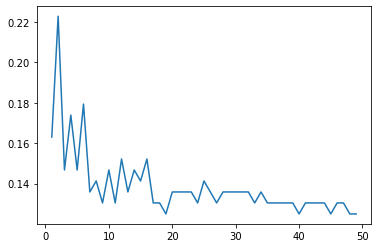

In [13]:
plt.plot(*zip(*sorted(val_err_dict.items())))
plt.show()

In [14]:
min_err = min(val_err_dict.values())

In [15]:
{key:value for key, value in val_err_dict.items() if value == min_err}

{19: 0.125, 40: 0.125, 45: 0.125, 48: 0.125, 49: 0.125}

Let's choose K = 19

In [16]:
Y_test_prediction = knn(X_train,Y_train,X_test , 19)
test_error = 1 - accuracy_score(Y_test,Y_test_prediction)

In [17]:
Y_test_prediction2 = knn(X_train,Y_train,X_test , 9)
test_error = 1 - accuracy_score(Y_test,Y_test_prediction)

In [18]:
print ('Accuracy of the classifier with K = 19 is', accuracy_score(Y_test, Y_test_prediction)*100, '%')

Accuracy of the classifier with K = 19 is 88.04347826086956 %


In [19]:
print ('Accuracy of the classifier with K = 9 is', accuracy_score(Y_test, Y_test_prediction2)*100, '%')

Accuracy of the classifier with K = 9 is 85.86956521739131 %


### LET'S DO IT WITH K FOLD CROSS VALIDATION

In [21]:
df_cv = final_dataFrame.copy()

In [22]:
Y = df_cv.HeartDisease.values # Y is now a numpy array
X = df_cv.drop(['HeartDisease'],axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


### Train-Test Split

In [23]:
#now the data is split into 80%-20% where the 20% test data is completely untouched
#the rest 80% data (train-validation) are then divided into 4 folds for cross validation

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_, Y_, train_size = 0.8, random_state = 42)

In [24]:
#now the rest of the dataset(80%) will be part of the cross-validation

train_data = X_train_val.copy()
train_data['HeartDisease'] = Y_train_val.tolist()
train_data.shape #734 X 21

(734, 21)

In [25]:
type(train_data)

pandas.core.frame.DataFrame

In [27]:
#four folds - 80% of the original data 

cv_1 = train_data.iloc[0:183]                                            
cv_2 = train_data.iloc[184:367]
cv_3 = train_data.iloc[368:551]
cv_4 = train_data.iloc[552:733]

In [28]:
#creating four different train-test split 

train_model_1 = pd.concat([cv_1, cv_2, cv_3])
test_model_1 = cv_4

train_model_2 = pd.concat([cv_1, cv_2, cv_4])
test_model_2 = cv_3

train_model_3 = pd.concat([cv_1, cv_3, cv_4])
test_model_3 = cv_2

train_model_4 = pd.concat([cv_2, cv_3, cv_4])
test_model_4 = cv_1

In [29]:
# seperating the X and Y in each fold

train_model_1_Y = train_model_1.HeartDisease.values
train_model_1_X = train_model_1.drop(['HeartDisease'],axis=1)
test_model_1_Y = test_model_1.HeartDisease.values
test_model_1_X = test_model_1.drop(['HeartDisease'],axis=1)

train_model_2_Y = train_model_2.HeartDisease.values
train_model_2_X = train_model_2.drop(['HeartDisease'],axis=1)
test_model_2_Y = test_model_2.HeartDisease.values
test_model_2_X = test_model_2.drop(['HeartDisease'],axis=1)

train_model_3_Y = train_model_3.HeartDisease.values
train_model_3_X = train_model_3.drop(['HeartDisease'],axis=1)
test_model_3_Y = test_model_3.HeartDisease.values
test_model_3_X = test_model_3.drop(['HeartDisease'],axis=1)

train_model_4_Y = train_model_4.HeartDisease.values
train_model_4_X = train_model_4.drop(['HeartDisease'],axis=1)
test_model_4_Y = test_model_4.HeartDisease.values
test_model_4_X = test_model_4.drop(['HeartDisease'],axis=1)

### Standardization

In [30]:
X_test = (X_test - X_test.mean()) / X_test.std()

train_model_1_X = (train_model_1_X - train_model_1_X.mean()) / train_model_1_X.std()
test_model_1_X = (test_model_1_X - test_model_1_X.mean()) / test_model_1_X.std()

train_model_2_X = (train_model_2_X - train_model_2_X.mean()) / train_model_2_X.std()
test_model_2_X = (test_model_2_X - test_model_2_X.mean()) / test_model_2_X.std()

train_model_3_X = (train_model_3_X - train_model_3_X.mean()) / train_model_3_X.std()
test_model_3_X = (test_model_3_X - test_model_3_X.mean()) / test_model_3_X.std()

train_model_4_X = (train_model_4_X - train_model_4_X.mean()) / train_model_4_X.std()
test_model_4_X = (test_model_4_X - test_model_4_X.mean()) / test_model_4_X.std()

### Panda Dataframe to Numpy Array

In [32]:
X_test_numpy = X_test.to_numpy()   #20% of the main dataset
X_train_val_numpy = X_train_val.to_numpy() #80% of the main dataset

train_model_1_X_numpy = train_model_1_X.to_numpy()
train_model_2_X_numpy = train_model_2_X.to_numpy()
train_model_3_X_numpy = train_model_3_X.to_numpy()
train_model_4_X_numpy = train_model_4_X.to_numpy()

test_model_1_X_numpy = test_model_1_X.to_numpy()
test_model_2_X_numpy = test_model_2_X.to_numpy()
test_model_3_X_numpy = test_model_3_X.to_numpy()
test_model_4_X_numpy = test_model_4_X.to_numpy()

In [48]:
k_range = range(1, 51)
k_score = []

for k in k_range:
    Y_model_1_pred = knn(train_model_1_X_numpy,train_model_1_Y,test_model_1_X_numpy , k)
    Y_model_2_pred = knn(train_model_2_X_numpy,train_model_2_Y,test_model_2_X_numpy , k)
    Y_model_3_pred = knn(train_model_3_X_numpy,train_model_3_Y,test_model_3_X_numpy , k)
    Y_model_4_pred = knn(train_model_4_X_numpy,train_model_4_Y,test_model_4_X_numpy , k)
    
    model_1_error = 1 - accuracy_score(test_model_1_Y,Y_model_1_pred)
    model_2_error = 1 - accuracy_score(test_model_2_Y,Y_model_2_pred)
    model_3_error = 1 - accuracy_score(test_model_3_Y,Y_model_3_pred)
    model_4_error = 1 - accuracy_score(test_model_4_Y,Y_model_4_pred)
    
    k_score.append((model_1_error + model_2_error + model_3_error + model_4_error) / 4)

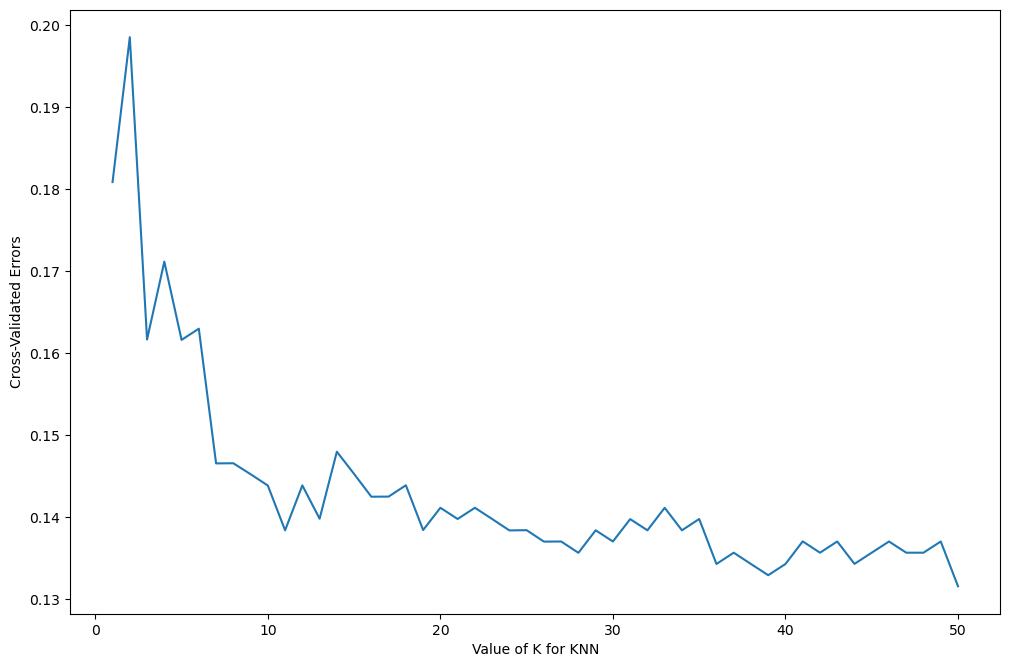

In [55]:
# plot to see clearly
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=100)

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Errors')
plt.show()

In [59]:
k = [9,12,17,19,28,29, 48]

for i in k:  
    Y_test_pred_1 = knn(train_model_1_X_numpy,train_model_1_Y,X_test_numpy , i)
    Y_test_pred_2 = knn(train_model_2_X_numpy,train_model_2_Y,X_test_numpy , i)
    Y_test_pred_3 = knn(train_model_3_X_numpy,train_model_3_Y,X_test_numpy , i)
    Y_test_pred_4 = knn(train_model_4_X_numpy,train_model_4_Y,X_test_numpy , i)

    acc_1 = accuracy_score(Y_test,Y_test_pred_1)
    acc_2 = accuracy_score(Y_test,Y_test_pred_2)
    acc_3 = accuracy_score(Y_test,Y_test_pred_3)
    acc_4 = accuracy_score(Y_test,Y_test_pred_4)

    average = (acc_1+acc_2+acc_3+acc_4)/4

    print ('Accuracy for k = ', i, 'is: ', average*100, '%')

Accuracy for k =  9 is:  86.54891304347827 %
Accuracy for k =  12 is:  85.59782608695652 %
Accuracy for k =  17 is:  86.54891304347825 %
Accuracy for k =  19 is:  86.14130434782608 %
Accuracy for k =  28 is:  85.7336956521739 %
Accuracy for k =  29 is:  85.46195652173914 %
Accuracy for k =  48 is:  85.59782608695652 %
